In [1]:
import pandas as pd
import numpy as np


In [2]:
# read the csv into a data frame
df = pd.read_csv('data/Eartquakes-1990-2023.csv')
df["state"]

0               Alaska
1               Hawaii
2           California
3           California
4           California
              ...     
3445746          Japan
3445747         Alaska
3445748           B.C.
3445749     California
3445750         Alaska
Name: state, Length: 3445751, dtype: object

In [3]:
df["state"] = df["state"].str.strip()
# list of dictionaries "plot_data"
plot_data = dict()
for x in df.index:
    year = str(df.loc[x, 'date'].split('-')[0])
    magnitudo = df.loc[x, 'magnitudo']
    state = df.loc[x, 'state']
    if state not in plot_data:
        plot_data[state] = {year: [magnitudo]}
    elif year not in plot_data[state]:
        plot_data[state][year] = [magnitudo]
    else:
        plot_data[state][year].append(magnitudo)


In [4]:
len(plot_data)

765

In [5]:
for state in plot_data:
    for year in plot_data[state]:
        avg = sum(plot_data[state][year])/len(plot_data[state][year])
        plot_data[state][year]=avg

plot_data

{'Alaska': {'1990': 2.1432432432432433,
  '1991': 2.0110912981455065,
  '1992': 2.0573576583801136,
  '1993': 2.2537469424060483,
  '1994': 2.1968763652249867,
  '1995': 2.1363136176066053,
  '1996': 2.369227769110761,
  '1997': 2.132630646589906,
  '1998': 2.1151453809348557,
  '1999': 2.0511111111111036,
  '2000': 2.1452512861100126,
  '2001': 2.0179355009251916,
  '2002': 1.7177802337653614,
  '2003': 1.6216322451699132,
  '2004': 1.6416951529494328,
  '2005': 1.8379667063020073,
  '2006': 1.9321783716594196,
  '2007': 1.8159791414470658,
  '2008': 1.68300364758699,
  '2009': 1.601829929137151,
  '2010': 1.8440500889152418,
  '2011': 1.6602551727032422,
  '2012': 1.5845685547908994,
  '2013': 1.6299710938688574,
  '2014': 1.4729012972054067,
  '2015': 1.5687325567285624,
  '2016': 1.5439552176455904,
  '2017': 1.5609863399932193,
  '2018': 1.5982047815843496,
  '2019': 1.3777727496943932,
  '2020': 1.384071966817958,
  '2021': 1.4210883066580595,
  '2022': 1.4203849867493754,
  '202

In [6]:
import matplotlib.pyplot as plt


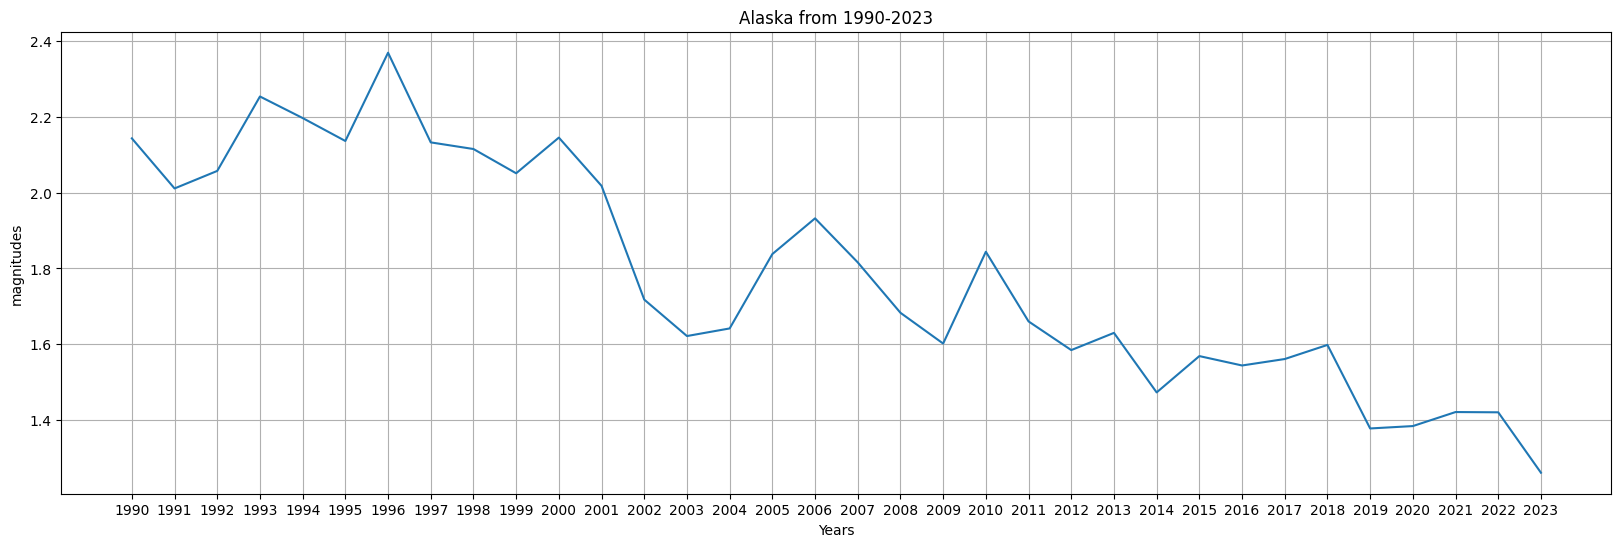

In [9]:
x = list(plot_data['Alaska'].keys())
y = list(plot_data['Alaska'].values())
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.xlabel('Years')
plt.ylabel('magnitudes')
plt.title("Alaska from 1990-2023")
plt.grid(True)
plt.show()

In [22]:
def draw(xlabel, ylabel, title, grid, x, y):
    plt.figure(figsize=(20, 6))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    plt.show()

In [10]:
df["year"] = df["date"].apply(lambda date:date.split(" ")[0].split("-")[0])
max_mag_per_year = df.groupby(["state","year"])["magnitudo"].max()


In [17]:
plot = max_mag_per_year["California"]


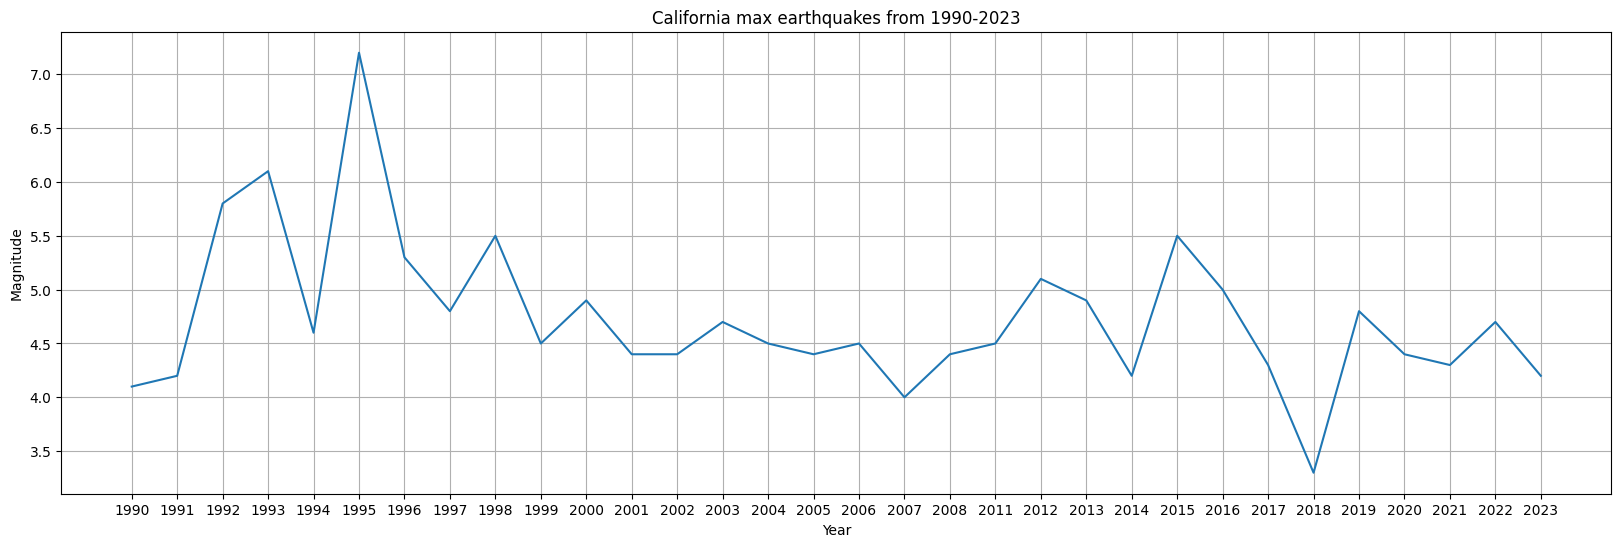

In [26]:
draw('Year', 'Magnitude', "California max earthquakes from 1990-2023", True, list(plot.index), plot)

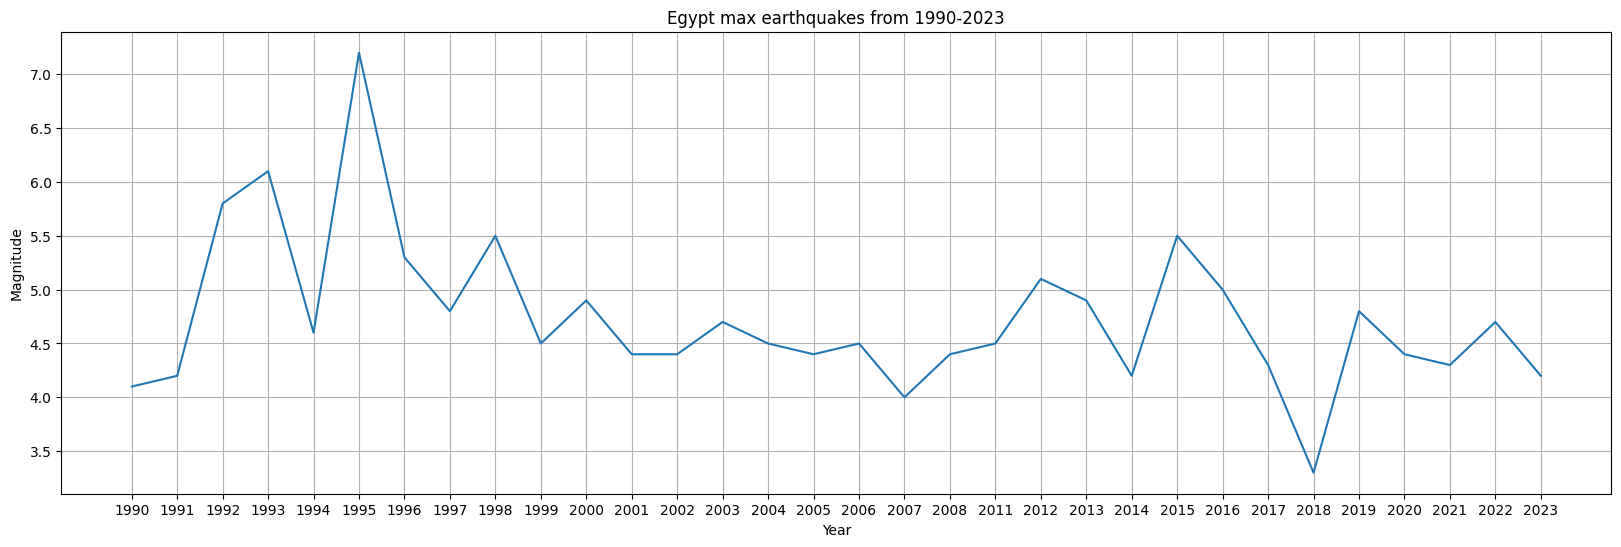

In [27]:
plot = max_mag_per_year["Egypt"]
draw('Year', 'Magnitude', "Egypt max earthquakes from 1990-2023", True, list(plot.index), plot)

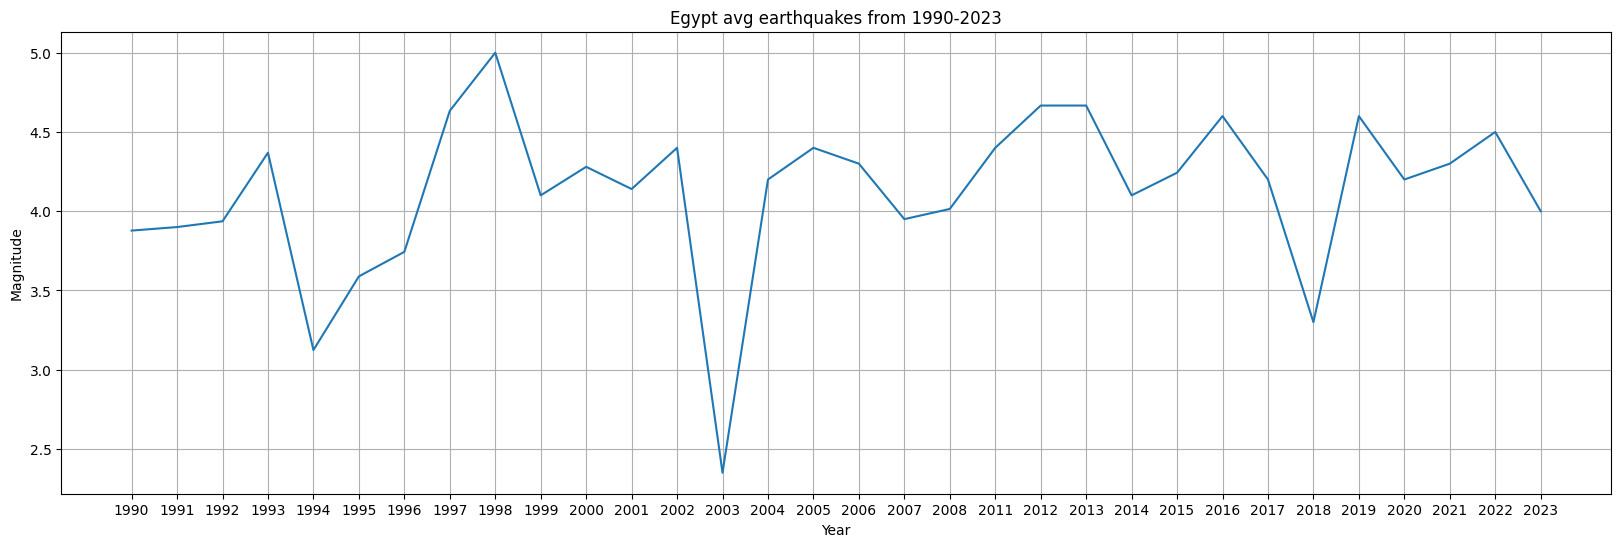

In [28]:
avg_mag_per_year = max_mag_per_year = df.groupby(["state","year"])["magnitudo"].mean()
plot = avg_mag_per_year["Egypt"]
draw('Year', 'Magnitude', "Egypt avg earthquakes from 1990-2023", True, list(plot.index), plot)